### Introduction

We will exemplify the probabilistic record linkage model using sample data from R's RecordLinkage package, called rl500, which consists of 500 records of individual data. The data is loaded from R and transformed into .csv file

In [12]:
import pandas as pd
import numpy as np

In [13]:
# Load dataset
rl500 = pd.read_csv('./data/RLdata500.csv')

In [14]:
rl500.head()

,fname_c1,fname_c2,lname_c1,lname_c2,by,bm,bd
0,CARSTEN,NaN,MEIER,NaN,1949,7,22
1,GERD,NaN,BAUER,NaN,1968,7,27
2,ROBERT,NaN,HARTMANN,NaN,1930,4,30
3,STEFAN,NaN,WOLFF,NaN,1957,9,2
4,RALF,NaN,KRUEGER,NaN,1966,1,13


In [34]:
rl500.isnull().sum()

fname_c1      0
fname_c2    472
lname_c1      0
lname_c2    492
by            0
bm            0
bd            0
key           0
dtype: int64

In [35]:
rl500[rl500.fname_c2.isnull()==False]

,fname_c1,fname_c2,lname_c1,lname_c2,by,bm,bd,key
27,JAN,JUERGEN,SCHAEFER,NaN,1946,5,25,1
31,CHRISTIAN,JENS,SCHULZ,NaN,2008,5,18,1
32,ANDREAS,FRANK,SCHUMACHER,NaN,1928,7,7,1
55,PETER,GUENTHER,ZIMMERMANN,NaN,1996,2,10,1
100,MANFRED,ANDREAS,SCHULZ,NaN,1998,4,9,1
195,DIETER,KLAUS,SCHMIDT,NaN,1950,8,20,1
199,GUENTHER,FRIEDRICH,WOLF,NaN,1975,4,23,1
240,CHRISTIAN,ALEXANDER,HERRMANN,NaN,1982,7,9,1
267,GABRIELE,GISELA,MEIER,NaN,1961,4,10,1
276,ERIKA,EDITH,BECKER,NaN,1970,7,12,1


In [36]:
rl500[rl500.lname_c2.isnull()==False]

,fname_c1,fname_c2,lname_c1,lname_c2,by,bm,bd,key
58,BERND,NaN,JUNG,KLEIN,1935,1,14,1
172,UWE,NaN,WEBER,ENGEL,1952,7,7,1
218,KLAUS,NaN,SCHMIDT,SCHMIDT,1997,12,15,1
335,JUTTA,NaN,ROTH,SCHMITT,1995,2,4,1
359,BRIGITTE,NaN,WAGNER,SCHULZE,1978,12,11,1
418,HEIKE,NaN,OTTO,FISCHER,1944,1,2,1
454,JUTTA,NaN,LEHMANN,SCHULZ,1974,11,7,1
478,JUTTA,NaN,WEBER,KRUEGER,2007,9,28,1


### Probabilistic Record Linkage

The goal of the probabilistic record linkage approach is to identify potential record pairs match by comparing each field from the record pair. There is often the case that when two records of an individual came from different data sources, not all fields are matched, for example, only lastname and birth date matches while firstname does not match because of data input error. Still, we should match these two records as they are considered the same person. In fact, based on individual field match between two record pairs, we will be able to calculate probabilities that the two records represent the same person.

The theoretical framework behind the probabilistic record linkage is conditional probabilities. We can model the problem using conditional probabilities as below:

Let M is the event where two records represent the same person (matched pair)
Let D is the event where two records  represent the different person (non-matched pair)
Let x1, x2, x3, ... xn are the events that two fields agree (for each of the n fields)

Hence, we can define the following probabilities:<br/>
    $ P(M|x_1,...,x_n) $ denotes probability that two records are matched given the fields $ x_1,...,x_n $ matches <br/>
   $ P(D|x_1,...,x_n) $ denotes probability that two records are not matched given the fiedls $ x_1,....,x_n $ matches <br/>
   $ P(x_1|M) $ denotes probability that the field $ x_1 $ matches given two records are matched, we will represent this as m <br/>
   $ P(x_1|D) $ denotes probability that the field $ x_1 $ matches given two records are different, we will represent this as u
    
To decide whether a record pair is a match or not, we have to determines the probability $ P(M|x_1,...,x_n) $ vs $ P(D|x_1,...,x_n) $. That is, a record pair is a match if 

$$ P(M|x_1,...,x_n) > P(D|x_1,...,x_n) $$

Using Bayes' rule and the independent assumption, we have:

$$ \frac {P(x_1|M)P(x_2|M)...P(x_n|M) * P(M)} {P(x)}  > \frac {P(x_1|D)P(x_2|D)...P(x_n|D) * P(D)} {P(x)} $$

We can rewrite the equation above as:

$$ \frac {P(M) \prod_{i=1}^n P(x_i|M)} {P(x)} > \frac {P(D) \prod_{i=1}^n P(x_i|D)} {P(x)} $$

$ P(x) $ can be cancelled out on both side and we takes logarithm on both sides:
$$ ln(P(M)\prod_{i=1}^n P(x_i|M))> ln(P(D)\prod_{i=1}^n P(x_i|D)) $$

and
$$ ln(P(M)) + \sum_{i=1}^n ln(P(x_i|M))> ln(P(D)) + \sum_{i=1}^n ln(P(x_i|D)) $$

We will have
$$ \sum_{i=1}^n (ln(P(x_i|M) - ln(P(x_i|D)) > ln(P(D)) - ln(P(M)) $$


As $ P(x_i|M) $ or $ m $ as we defined above is the probability that field $ x_i $ match given the record match, the probability that the field $ x_i $ does not match given the record pair match is $ (1-m) $. Hence, the probability that the field $ x_i $ does not match give the record pair is not match is $ (1-u) $.

We can say that if the field match the term $ (ln(P(x_i|M) - ln(P(x_i|D)) = ln(m_i) - ln(u_i) $ <br/>
and that if the field differ the term $ (ln(P(x_i|M) - ln(P(x_i|D)) = ln(1-m_i) - ln(1-u_i) $

Lastly, we can define $ ln(P(D)) - ln(P(M)) $ as a constant lambda $ \lambda $ and refer to it as threshold value, so if the calculation on the left-handed side of the equation exceeds threshold, we can say that the two record pair are likely to be matching pair. 

In practice, we usually define the threshold into three region: non-match, questionable match and match, and output those questionable match pairs for manual clerical review (expert review to identify if the pair should be matched since the system cannot decide)



In conclustion, we can summarize the probabilistic record linkage model as: <br/>

$ \sum_{i=1}^n $<br/>
$ ln(m_i) - ln(u_i), if x_i agrees $ <br/>
$ ln(1-m_i) - ln(1-u_i), if x_i disagrees $

### Implementation

#### Defining m-probability and u-probability
From the model, we only need to define m-probability and u-probability

Recall that<br/>
   m-probability or $ P(x_1|M) $ is the probability that the field $ x_1 $ matches given two records are matched<br/>
   u-probability or $ P(x_1|D) $ is the probability that the field $ x_1 $ matches given two records are different<br/>
   
m-probability is defined by prior knowledge about the dataset. By default, we set m-probability = 0.95 and we can adjust the value later no as we learn more about the data

u-probability, in contrast, can be calculated from the dataset. In fact, it is the probability that the field match by chance given the record pair is differing. For example, if we compares 'birth month' field, there is 1/12 chance that two differing records could contain the same birth month since there are 12 months in total. We can apply this same approach in every field in the comparing set.

In [6]:
# U-probability is the proportion of unique value in the field from dataset
def calc_u_prob(field, df):
    return 1 / float(len(df[field].unique()))

def calc_m_prob(field, df):
    return 0.95

In [7]:
# Agreement and Disagreement weight formula based on the model
import math
def agreement_weight(m, u):
    return math.log(m / u ,2)
    
def disagreement_weight(m, u):
    return math.log((1-m)/(1-u),2)

In [8]:
def field_weight(field, comp):
    if comp:
        weight = agreement_weight(m_prob[field], u_prob[field])
    else:
        weight = disagreement_weight(m_prob[field], u_prob[field])
    return weight

In [26]:
# Create dummy field to perform cartesian product using Pandas Merge
rl500['key'] = 1

In [28]:
rl500_pairs = pd.merge(rl500, rl500, on='key')

In [33]:
rl500_pairs.shape, rl500.shape

((250000, 15), (500, 8))

In [31]:
rl500_pairs.head()

,fname_c1_x,fname_c2_x,lname_c1_x,lname_c2_x,by_x,bm_x,bd_x,key,fname_c1_y,fname_c2_y,lname_c1_y,lname_c2_y,by_y,bm_y,bd_y
0,CARSTEN,NaN,MEIER,NaN,1949,7,22,1,CARSTEN,NaN,MEIER,NaN,1949,7,22
1,CARSTEN,NaN,MEIER,NaN,1949,7,22,1,GERD,NaN,BAUER,NaN,1968,7,27
2,CARSTEN,NaN,MEIER,NaN,1949,7,22,1,ROBERT,NaN,HARTMANN,NaN,1930,4,30
3,CARSTEN,NaN,MEIER,NaN,1949,7,22,1,STEFAN,NaN,WOLFF,NaN,1957,9,2
4,CARSTEN,NaN,MEIER,NaN,1949,7,22,1,RALF,NaN,KRUEGER,NaN,1966,1,13


In [38]:
# Split data into 2 dataframes
# We drop fname_c2 and lname_c2 here as there are many missing value in those two fields
df_a = rl500_pairs[['fname_c1_x','lname_c1_x','by_x','bm_x','bd_x']]
df_b = rl500_pairs[['fname_c1_y','lname_c1_y','by_y','bm_y','bd_y']]

In [39]:
column_name = ['fname_c1','lname_c1','by','bm','bd']
df_a.columns = column_name
df_b.columns = column_name

In [40]:
df_a.shape, df_b.shape

((250000, 5), (250000, 5))

In [41]:
df_a.head()

,fname_c1,lname_c1,by,bm,bd
0,CARSTEN,MEIER,1949,7,22
1,CARSTEN,MEIER,1949,7,22
2,CARSTEN,MEIER,1949,7,22
3,CARSTEN,MEIER,1949,7,22
4,CARSTEN,MEIER,1949,7,22


In [42]:
df_b.head()

,fname_c1,lname_c1,by,bm,bd
0,CARSTEN,MEIER,1949,7,22
1,GERD,BAUER,1968,7,27
2,ROBERT,HARTMANN,1930,4,30
3,STEFAN,WOLFF,1957,9,2
4,RALF,KRUEGER,1966,1,13


In [43]:
u_prob = {}
m_prob = {}
columns = df_a.columns.tolist()
# Create U-probability table (dataframe) : frequency count of source table
for col in columns:
    u_prob[col] = calc_u_prob(col, df_a)
    m_prob[col] = calc_m_prob(col, df_a)

In [45]:
u_prob, m_prob

({'bd': 0.03225806451612903,
  'bm': 0.08333333333333333,
  'by': 0.011627906976744186,
  'fname_c1': 0.00684931506849315,
  'lname_c1': 0.009259259259259259},
 {'bd': 0.95, 'bm': 0.95, 'by': 0.95, 'fname_c1': 0.95, 'lname_c1': 0.95})

In [46]:
# Initiate comparison matrix and calculated weight matrix
com_matrix = pd.DataFrame(np.zeros(df_a.shape), columns=df_a.columns)
weight_matrix = pd.DataFrame(np.zeros(df_a.shape), columns=df_a.columns)

In [48]:
# Compare and fill the result into the comparison matrix
for col in columns:
    com_matrix[col] = (df_a[col] == df_b[col])

In [52]:
com_matrix.head()

,fname_c1,lname_c1,by,bm,bd
0,True,True,True,True,True
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [50]:
# Calculate total weight from the record comparison and fill into the weight matrix
for col in columns:
    weight_matrix[col] = com_matrix[col].apply(lambda x: field_weight(col, x))

In [53]:
weight_matrix.head()

,fname_c1,lname_c1,by,bm,bd
0,7.115824,6.680887,6.352264,3.510962,4.880196
1,-4.312013,-4.308508,-4.305054,3.510962,-4.274622
2,-4.312013,-4.308508,-4.305054,-4.196397,-4.274622
3,-4.312013,-4.308508,-4.305054,-4.196397,-4.274622
4,-4.312013,-4.308508,-4.305054,-4.196397,-4.274622


In [54]:
# Sum to get total weight
weight_matrix['score'] = weight_matrix.sum(axis=1)

In [55]:
weight_matrix.head()

,fname_c1,lname_c1,by,bm,bd,score
0,7.115824,6.680887,6.352264,3.510962,4.880196,28.540133
1,-4.312013,-4.308508,-4.305054,3.510962,-4.274622,-13.689235
2,-4.312013,-4.308508,-4.305054,-4.196397,-4.274622,-21.396594
3,-4.312013,-4.308508,-4.305054,-4.196397,-4.274622,-21.396594
4,-4.312013,-4.308508,-4.305054,-4.196397,-4.274622,-21.396594


In [56]:
weight_matrix.score.describe()

count    250000.000000
mean        -19.899057
std           4.142839
min         -21.396594
25%         -21.396594
50%         -21.396594
75%         -21.396594
max          28.540133
Name: score, dtype: float64

In [58]:
len(weight_matrix[weight_matrix.score > 10])

592

#### Distribution of the score

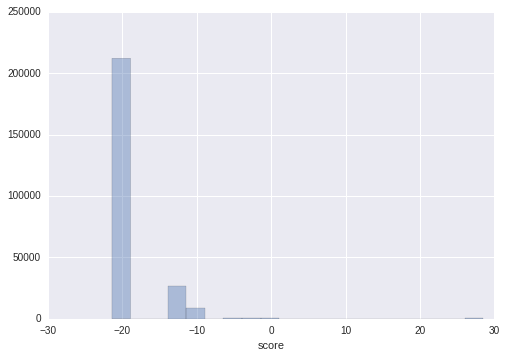

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.distplot(weight_matrix.score, bins=20, kde=0)

As we can see from the distribution of calculated weight score is lower than zero since most of the records are differing. There are some record pairs that score higher than 20, they are most likely those records that compare to themselves because we did not remove those pairs before calculating the weight (which we should have done it).

Hence, we will pick sample of the record pairs that scores in range 0 - 20 (positively) to evaluate the result

In [70]:
weight_matrix[(weight_matrix.score > 0) & (weight_matrix.score < 20)].head(10)

,fname_c1,lname_c1,by,bm,bd,score
542,7.115824,-4.308508,6.352264,3.510962,4.880196,17.550738
1549,7.115824,-4.308508,6.352264,-4.196397,-4.274622,0.688561
1733,7.115824,-4.308508,6.352264,-4.196397,-4.274622,0.688561
1891,-4.312013,-4.308508,6.352264,3.510962,4.880196,6.122902
7496,-4.312013,6.680887,6.352264,-4.196397,-4.274622,0.250119
8192,-4.312013,6.680887,6.352264,-4.196397,4.880196,9.404937
9049,7.115824,6.680887,-4.305054,-4.196397,-4.274622,1.020637
9214,7.115824,6.680887,-4.305054,-4.196397,-4.274622,1.020637
9233,7.115824,6.680887,-4.305054,-4.196397,-4.274622,1.020637
10421,-4.312013,6.680887,6.352264,-4.196397,-4.274622,0.250119


In [71]:
match_index = weight_matrix[(weight_matrix.score > 0) & (weight_matrix.score < 20)].head(10).index.tolist()

In [72]:
match_index

[542, 1549, 1733, 1891, 7496, 8192, 9049, 9214, 9233, 10421]

In [73]:
pd.merge(weight_matrix[(weight_matrix.score > 0) & (weight_matrix.score < 20)].head(10)[['score']], \
         rl500_pairs[rl500_pairs.index.isin(match_index)][['fname_c1_x','lname_c1_x','by_x','bm_x','bd_x', \
                                                  'fname_c1_y','lname_c1_y','by_y','bm_y','bd_y']], \
         left_index = True, right_index = True)

,score,fname_c1_x,lname_c1_x,by_x,bm_x,bd_x,fname_c1_y,lname_c1_y,by_y,bm_y,bd_y
542,17.550738,GERD,BAUER,1968,7,27,GERD,BAUERH,1968,7,27
1549,0.688561,STEFAN,WOLFF,1957,9,2,STEFAN,MUELLER,1957,6,7
1733,0.688561,STEFAN,WOLFF,1957,9,2,STEFAN,MUELLER,1957,6,1
1891,6.122902,STEFAN,WOLFF,1957,9,2,HELGA,KOCH,1957,9,2
7496,0.250119,WALTER,SCHNEIDER,1953,8,26,SABINE,SCHNEIDER,1953,5,20
8192,9.404937,ALEXANDER,MUELLER,1974,9,9,CHRISTIAN,MUELLER,1974,8,9
9049,1.020637,STEFAN,MUELLER,1949,8,13,STEFAN,MUELLER,1957,6,7
9214,1.020637,STEFAN,MUELLER,1949,8,13,STEFAN,MUELLER,2004,4,20
9233,1.020637,STEFAN,MUELLER,1949,8,13,STEFAN,MUELLER,1957,6,1
10421,0.250119,DENNIS,SCHAEFER,1956,4,11,INGRID,SCHAEFER,1956,10,22


As we can see from the result shown above, the record at the index 542 scores 17.55 because the same first name and birthdate and the slight difference lastname (BAUER vs BAUERH), which could be due to typo error.

The index 8192, ALEXANDER MUELLER and CHRISTIAN MUELLER is questionable, the same lastname and the birth month difference could result from typo error; however, we can treat this record pair as questionable and require further review.

The record at the index 9049, 9214 and 9233 scores low despite the same firstname and lastname, since they have different birthdate